<a href="https://colab.research.google.com/github/MiguelJ125/AnalisisExploratorioDatos/blob/main/AED_Grupo_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Especializado: Data Science**

---

## ![Img AltText](https://i.gyazo.com/6ba30f3470957ed146ed55da204fc31e.png)



## **Primer Trabajo Práctico**

##### **GRUPO: D**

##### **ALUMNOS:**
* Izquierdo, Lucas Damian.
* Jaramillo, Miguel.
* Jurado, Juan Cruz.

##### **PROFESOR:**
* Borda, Abraham.

# ***INTRODUCCION***

***En el presente análisis se trabajará con el archivo sube2020.csv en el cual están registradas todas las transacciones de uso de la tarjeta realizadas durante el año 2020. Ahora vamos a explorar un dataset para obtener información y crear un mejor sentido de comprensión sobre el mismo.***

***Las columnas que tenemos son:***

* ***DIA_TRANSPORTE:*** Indica la fecha del día en que se registra la cantidad de transacciones de cada empresa.
* ***NOMBRE_EMPRESA:*** Indica el nombre de la empresa de transporte.
* ***LINEA:*** descripción de la línea.
* ***AMBA:*** Si pertenece al AMBA o no (SI, NO)
* ***TIPO_TRANSPORTE:*** Si es colectivo, tren, Subte o lancha.
* ***JURISDICCION:*** tipo de jurisdicción de la línea (NACIONAL, PROVINCIAL, MUNICIPAL)
* ***PROVINCIA:*** Nombre de la provincia, en caso de ser jurisdicción provincial o municipal. Si es jurisdicción nacional figura JN.
* ***MUNICIPIO:*** Nombre del municipio, en caso de ser jurisdicción municipal. si es jurisdicción nacional o provincial figura SD o SN respectivamente.
* ***CANTIDAD:*** Cantidad de transacciones de uso.
* ***DATO_PRELIMINAR:*** (SI/NO)

# ***OBJETIVO***

***Buscamos analizar la cantidad de transaccion realizadas con la tarjeta SUBE corespondiente al año 2020. De esta manera podemos tener un panorama del uso que se le ha dado en el territorio argentino.***

# ***ANALISIS EXPLORATORIO***

## **Carga del Dataset y análisis de sus columnas, tipos de datos y variables.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sube = pd.read_csv('https://raw.githubusercontent.com/MiguelJ125/AnalisisExploratorioDatos/main/sube2020.csv')
sube

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO
...,...,...,...,...,...,...,...,...,...,...
356623,2020-12-31,EMPRESA CEFERINO SOCIEDAD ANONIMA,Línea G,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,55,NO
356624,2020-12-31,UNION PLATENSE SRL,NORTE MUNICIPAL,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,3245,NO
356625,2020-12-31,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,522,NO
356626,2020-12-31,ETACER SRL,STAFE_SANTA FE_LINEA_907,NO,COLECTIVO,NACIONAL,JN,SD,362,NO


***Ahora analizamos el tipo de dato de cada columna:***

In [ ]:
sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.2+ MB


***Variables numéricas y categóricas:***

***Numéricas (cuantitativas):***
* CANTIDAD

***Categóricas:***
* DIA_TRANSPORTE
* NOMBRE_EMPRESA
* LINEA
* AMBA
* TIPO_TRANSPORTE
* JURISDICCION
* PROVINCIA
* MUNICIPIO
* DATO_PRELIMINAR

***Ahora observamos si existen valores nulos.***

In [ ]:
sube.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

***Podemos observar que faltan la misma cantidad de datos en: jurisdiccion, provincia y municipio.***
 
***Entrando a la página de donde fue descargado el dataset, en contramos que estos valores nulos corresponden a los registros con el tipo de transporte: Subte. ***

***Verificamos:***

In [ ]:
import collections, numpy
collections.Counter(sube['TIPO_TRANSPORTE'])

Counter({'COLECTIVO': 346909, 'LANCHAS': 1288, 'SUBTE': 2561, 'TREN': 5870})

***En efecto la cantidad de registros con el tipo de transporte SUBTE es: 2561***

***Podemos observar la distribución de las variables categóricas:***

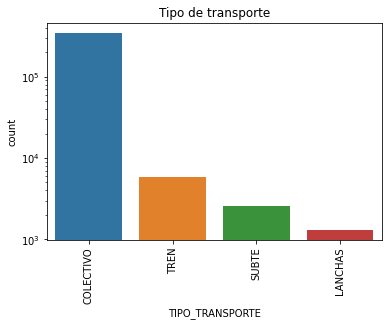

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='TIPO_TRANSPORTE', data=sube, order=sube.TIPO_TRANSPORTE.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Tipo de transporte")
plt.show()

***El gráfico nos muestra que la mayor cantidad de registros se hicieron usando el tipo de transporte colectivo.***

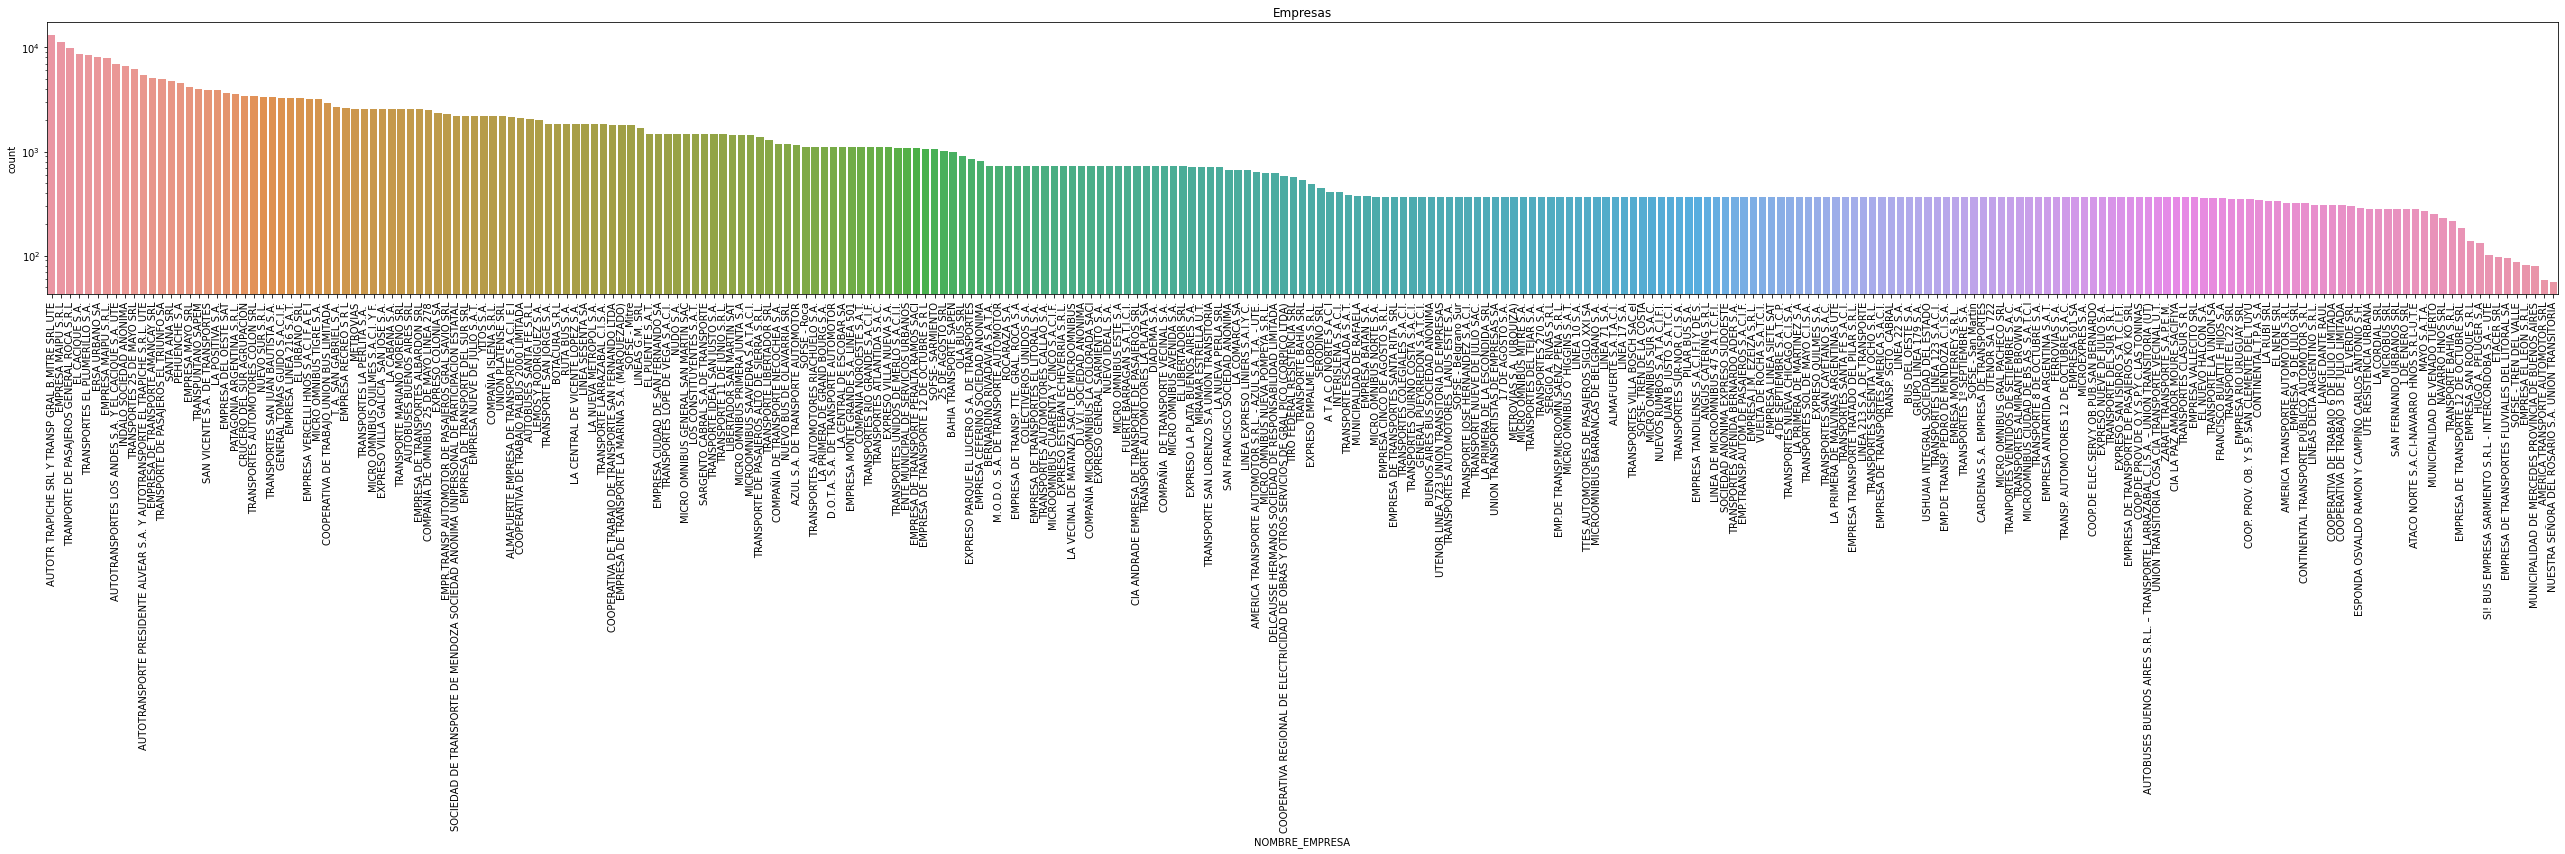

In [ ]:
fig = plt.figure(figsize=(45,5))
ax = plt.axes()
ax = sns.countplot(x='NOMBRE_EMPRESA', data=sube, order=sube.NOMBRE_EMPRESA.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Empresas")
plt.show()

***Podemos observar que es una variable con alta cardinalidad, en la cual se muestra la cantidad de registros que realizo la empresa a lo largo del año.***

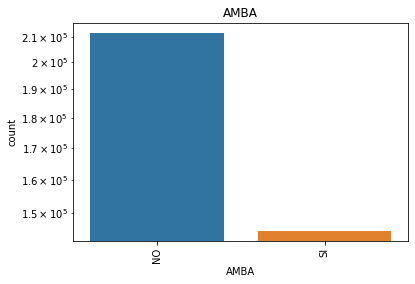

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='AMBA', data=sube, order=sube.AMBA.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("AMBA")
plt.show()

***Se puede observar que la mayoría de registros fueron realizados fuera de AMBA.***

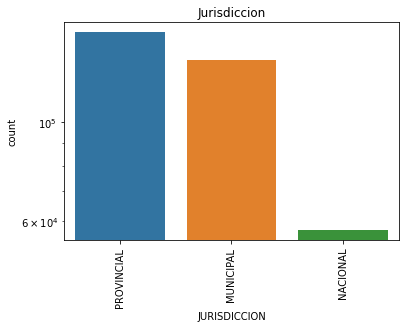

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='JURISDICCION', data=sube, order=sube.JURISDICCION.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Jurisdiccion")
plt.show()

***También podemos ver que la mayoría de registros fueron realizados en la categoría de jurisdicción provincial.***

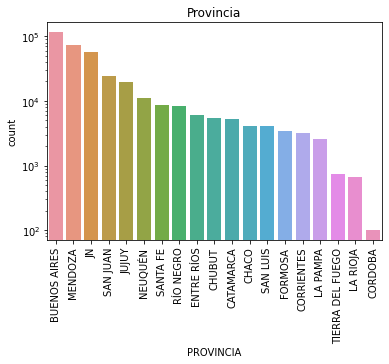

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='PROVINCIA', data=sube, order=sube.PROVINCIA	.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Provincia")
plt.show()

***Buenos Aires es la provincia que mayor cantidad de registros realizo, es importante también la variable JN (Jurisdicción nacional), ya que son viajes interprovinciales.***

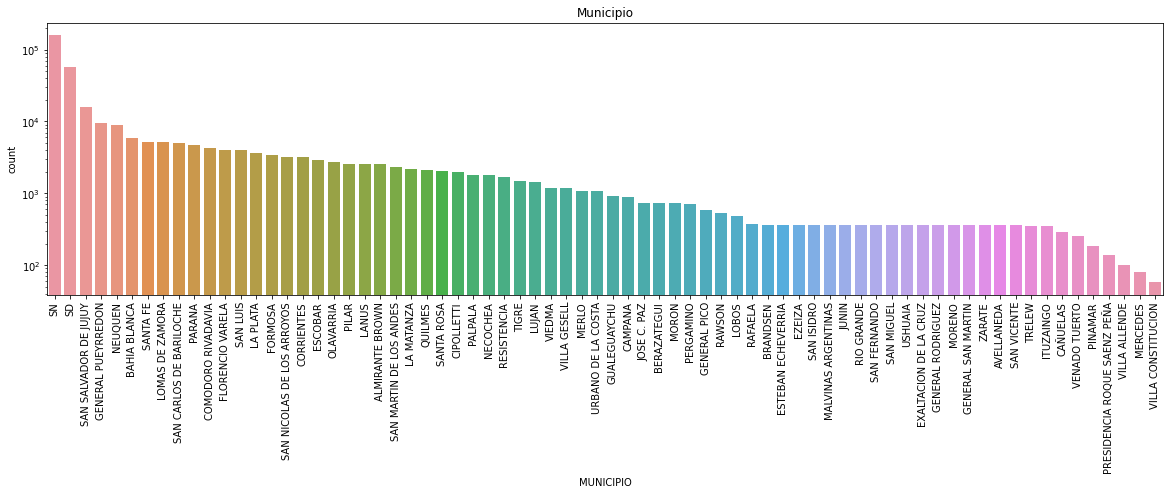

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='MUNICIPIO', data=sube, order=sube.MUNICIPIO.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Municipio")
plt.show()

***Podemos observar la distribución de la variable municipio siendo las dos variables con mayor cantidad de registros: SN y SD (Jurisdicción nacional y provincial)***

***Distribución de la única variable numérica:***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


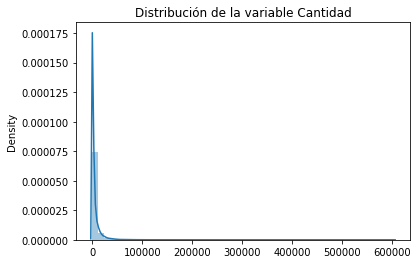

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=sube.CANTIDAD)
ax.set_title("Distribución de la variable Cantidad")
plt.show()

**Podemos observar que la mayoría de registros se realizaron con valores menores a 100000.**

## **Limpieza de Datos**

**Previo a todo análisis de datos se requieren varias verificaciones, la más directa es el que todos los datos obtenidos son relevantes para nuestro objetivo, para así no ensuciar y complicar la lectura y estudio del dataset. También siempre se analiza que todos los datos estén bien presentados y tengan valores razonables y, preferentemente, no nulos.**

In [ ]:
sube["DATO_PRELIMINAR"].value_counts()

NO    356628
Name: DATO_PRELIMINAR, dtype: int64

***Tras el primer chequeo del dataset que se está realizando se identifica que todos los valores de la columna de DATO_PRELIMINAR equivalen a "NO" por lo que no se podría hacer ningún análisis en esta columna y por esto se la decide eliminar. Esto es lo que lleva a cabo la siguiente línea de código.***

In [ ]:
sube = sube.drop(["DATO_PRELIMINAR"], axis = 1)

***Se verifica si existen valores nulos o "NaN" en el dataset para luego analizar que medidas se llevan a cabo frente a ellos.***

In [ ]:
nan_values = sube.isnull().any(axis=1)
nan_rows = sube[nan_values]
nan_rows

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
361,2020-01-01,METROVIAS,LIN_PREMETRO,SI,SUBTE,NaN,NaN,NaN,333
524,2020-01-01,METROVIAS,LINEA SUBTE C,SI,SUBTE,NaN,NaN,NaN,23378
525,2020-01-01,METROVIAS,LINEA SUBTE D,SI,SUBTE,NaN,NaN,NaN,17678
526,2020-01-01,METROVIAS,LINEA SUBTE E,SI,SUBTE,NaN,NaN,NaN,9361
527,2020-01-01,METROVIAS,LINEA SUBTE H,SI,SUBTE,NaN,NaN,NaN,11828
...,...,...,...,...,...,...,...,...,...
356254,2020-12-31,METROVIAS,LINEA SUBTE D,SI,SUBTE,NaN,NaN,NaN,15592
356255,2020-12-31,METROVIAS,LINEA SUBTE E,SI,SUBTE,NaN,NaN,NaN,4667
356256,2020-12-31,METROVIAS,LINEA SUBTE H,SI,SUBTE,NaN,NaN,NaN,9654
356604,2020-12-31,METROVIAS,LINEA_A,SI,SUBTE,NaN,NaN,NaN,16232


***Frentes a estos resultados confirmamos que todos los valores NaN de las columnas "JURISDICCION", "PROVINCIA" y "MUNICIPIO" corresponden a aquellos datos brindados por el transporte SUBTE.***

In [ ]:
nan_rows["TIPO_TRANSPORTE"].value_counts()

SUBTE    2561
Name: TIPO_TRANSPORTE, dtype: int64

In [ ]:
nan_rows["AMBA"].value_counts()

SI    2561
Name: AMBA, dtype: int64

***La línea de código previa confirma lo sospechado así que se busca una forma de como rellenar estos datos, a su vez se verifica y todos los viajes en subte ocurren dentro de AMBA.***
***En principio sabemos que todos los subtes de la Argentina se encuentran en la provincia de BUENOS AIRES por lo que podríamos rellenar toda esa columna con este valor. El saber que corresponden a AMBA nos hace inferir que en la columna "MUNICIPIO" le corresponderá el valor de "SN" que hacer referencia a jurisdiccion provincial, a su vez, pertencerá a "PROVINCIAL" en la columna de "JURISDICCIÓN".***

In [ ]:
sube["PROVINCIA"] = sube["PROVINCIA"].fillna(value = "BUENOS AIRES")
sube["JURISDICCION"] = sube["JURISDICCION"].fillna(value = "PROVINCIAL")
sube["MUNICIPIO"] = sube["MUNICIPIO"].fillna(value = "SN")

***Con el código previo se realizan los cambios antes dichos y se utiliza la misma verificación para analizar si todavía existen elementos con definición NaN.***

In [ ]:
nan_values = sube.isnull().any(axis=1)
nan_rows = sube[nan_values]
nan_rows

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD


***En los siguientes codigos se verifica la presencia de valores negativos en la columna de "CANTIDAD".***

In [ ]:
sube[sube["CANTIDAD"] < 0]

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
70380,2020-03-08,SOFSE - Mitre,FCC MITRE_TIGRE,SI,TREN,NACIONAL,JN,SD,-40
70382,2020-03-08,SOFSE- SARMIENTO,FFCC SAR MERLO - LOBOS,SI,TREN,NACIONAL,JN,SD,-14
70384,2020-03-08,SOFSE- SARMIENTO,FFCC SAR,SI,TREN,NACIONAL,JN,SD,-17
70390,2020-03-08,SOFSE - Mitre,FFCC_MITRE_ZARATE,SI,TREN,NACIONAL,JN,SD,-10
70395,2020-03-08,SOFSE - Mitre,FFCC_SUAREZ,SI,TREN,NACIONAL,JN,SD,-43


***Se decide eliminar las filas negativas en base a que tiene valores tan bajos que no son relevantes y además podrían traer errores en los análisis subsiguientes.***

In [ ]:
sube = sube.drop([70380,70382,70384,70390,70395], axis = 0)

***Se verifica que se hayan eliminado correctamente las filas previstas.***

In [ ]:
sube[sube["CANTIDAD"] < 0]

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD


***En la siguiente grafica se verifica la existencia de outliers***

Debido a que en la distribución de la variable cantidad observamos que los valores llegaban hasta el 600.000 con baja frecuencia.


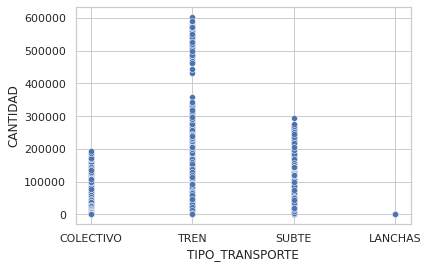

In [ ]:
sns.scatterplot(x="TIPO_TRANSPORTE", y="CANTIDAD", data=sube)

**Podemos concluir que esos valores no son outliers, ya que corresponden a registros realizados por empresas de trenes, lo cual tiene sentido porque los trenes transportan mayor número de pasajeros en relación a los colectivos.**

## **Analisis de ventas de boletos segun diferentes clasificaciones**

### ***Análisis de cantidad de ventas por Provincia***

***Basándonos en el objetivo planteado, un análisis importante es corroborar la cantidad de ventas de boletos en cada provincia. Se agrupa el DataFrame diferenciando las distintas provincias.***

In [ ]:
sube_PROV = sube.groupby(["PROVINCIA"])

***A través del método .size() se corrobora que se hayan distinguido correctamente las provincias.***

In [ ]:
sube_PROV.size()

PROVINCIA
BUENOS AIRES        118005
CATAMARCA             5171
CHACO                 4098
CHUBUT                5421
CORDOBA                101
CORRIENTES            3190
ENTRE RÍOS            5957
FORMOSA               3426
JN                   57371
JUJUY                19802
LA PAMPA              2605
LA RIOJA               672
MENDOZA              73880
NEUQUÉN              11201
RÍO NEGRO             8202
SAN JUAN             24176
SAN LUIS              4027
SANTA FE              8586
TIERRA DEL FUEGO       732
dtype: int64

***Se plantea un pequeño programa para recolectar toda la información de la columna "CANTIDAD" en otro DataFrame para así determinar mas a detalle la cantidad de ventas que ocurre en cada provincia. Los valores mostrados arriba son menos representativos puesto que no definen la cantidad de boletos vendidos si no que es solo una anotación de que ocurrio alguna transacción ese día aunque no sepamos cuantas.***

In [ ]:
dicc = {}
for grupo in sube_PROV.groups.keys():
  dicc[grupo] = sube_PROV.get_group(grupo)["CANTIDAD"].sum()

tabla_ventas = pd.DataFrame({"Provincia":dicc.keys(), "Ventas de boletos":dicc.values()})

tabla_ventas = pd.DataFrame(data = tabla_ventas)
tabla_ventas

,Provincia,Ventas de boletos
0,BUENOS AIRES,839981878
1,CATAMARCA,7687454
2,CHACO,10133793
3,CHUBUT,9340997
4,CORDOBA,14047
5,CORRIENTES,11794774
6,ENTRE RÍOS,6514750
7,FORMOSA,4514455
8,JN,747773250
9,JUJUY,33464162


***Se grafica para diferenciar las transacciones por provincia.***

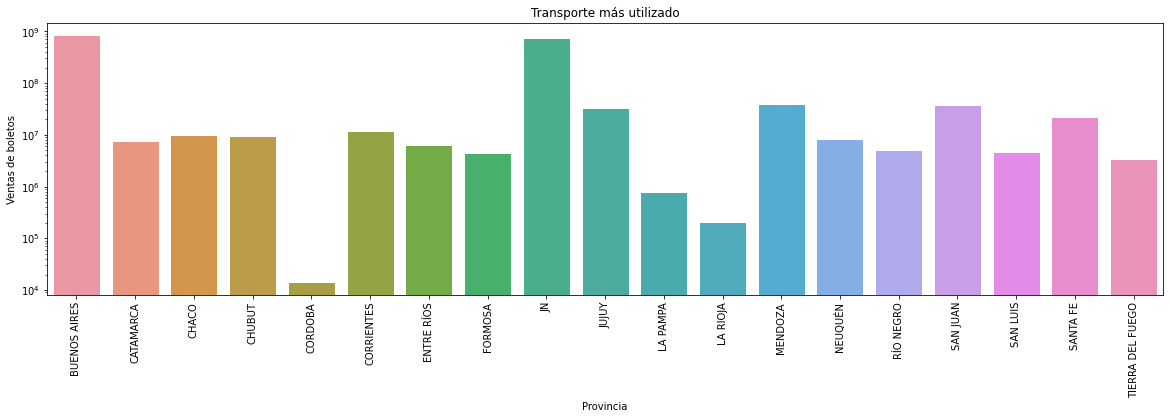

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Transporte más utilizado")
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=tabla_ventas["Provincia"], y=tabla_ventas['Ventas de boletos'])

***Puede verse que en Buenos Aires la cantidad es notablemente superior a aquella que se ve en las demas provincias, únicamente se le acerca "JN" que abarca transportes interprovinciales. Sin embargo hay que reconocer que todo dato de trenes está incluido en JN, inclusive si se trata de un tren interno a una provincia especifica, al AMBA o interprovincial.***

***Se decide separar la información de JN y BUENOS AIRES para poder analizar más a detalle la diferencia entre provincias.***

In [ ]:
tabla_ventas.drop([0 , 8], inplace = True)
tabla_ventas

,Provincia,Ventas de boletos
1,CATAMARCA,7687454
2,CHACO,10133793
3,CHUBUT,9340997
4,CORDOBA,14047
5,CORRIENTES,11794774
6,ENTRE RÍOS,6514750
7,FORMOSA,4514455
9,JUJUY,33464162
10,LA PAMPA,789510
11,LA RIOJA,204547


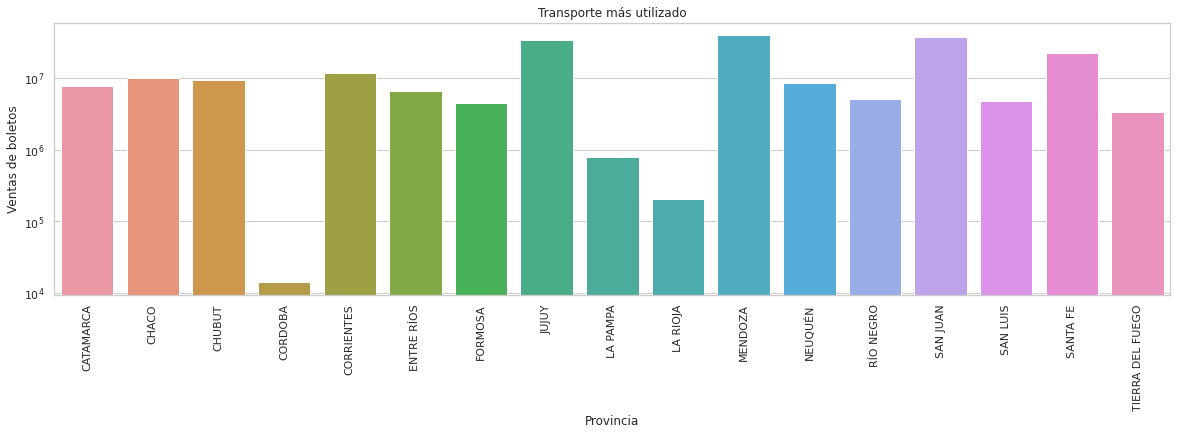

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Transporte más utilizado")
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=tabla_ventas["Provincia"], y=tabla_ventas['Ventas de boletos'])

***Algo notable en este gráfico es que Córdoba tiene valores muy bajos, esto si bien es llamativo, tambien es esperable puesto que los datos de este dataset corresponden a la tarjeta "Sube" y en Córdoba se tiene una tarjeta de transporte propia de la cual posiblemente no se esté recabando información en estas tablas.***

### **Análisis de AMBA**

***Tras lo observado en los gráficos superiores podemos reconocer que Buenos Aires es notablemente superior respecto a la cantidad de personas que allí se transportan, esto lleva a otro análisis lógico y es el de diferenciar las cantidades dentro y fuera del AMBA. Asimismo, la notable cantidad vista en "JN" puede verse sesgada por el inmenso flujo que posiblemente encontremos en los trenes internos del AMBA.***

***Se sigue una lógica igual a la anterior, se diferencia esta primera línea de código la cual, dentro de la agrupación anterior, ahora se restringe al grupo de Buenos Aires y se discrimina con un groupby del "AMBA" el cual diferenciará "SI" y "NO", luego se sigue la misma lógica.***

In [ ]:
sube_AMBA = sube_PROV.get_group("BUENOS AIRES").groupby("AMBA")

In [ ]:
AMBA_counts = pd.DataFrame({"AMBA":sube_AMBA.groups.keys(), 
                            "Ventas de boletos":[sube_AMBA.get_group("NO")["CANTIDAD"].sum(), sube_AMBA.get_group("SI")["CANTIDAD"].sum()]})
AMBA_counts

,AMBA,Ventas de boletos
0,NO,56830388
1,SI,783151490


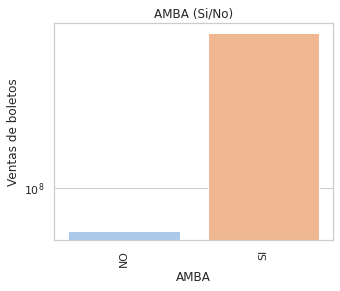

In [ ]:
#plt.barh(AMBA_counts["AMBA"],AMBA_counts["Ventas de boletos"])
fig = plt.figure(figsize=(5,4))
ax = plt.axes()
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("AMBA (Si/No)")
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=AMBA_counts["AMBA"], y=AMBA_counts['Ventas de boletos'])

***La siguiente línea de código muestra que únicamente el 6,76% de los boletos vendidos en Buenos Aires corresponden a la zona fuera del AMBA.***

In [ ]:
AMBA_counts["Ventas de boletos"][0]/(AMBA_counts["Ventas de boletos"].sum())*100

6.765668342192496

### **Análisis por época del año**

***En el siguiente código vamos a tomar la columna de fechas para agregar columnas al dataframe que digan:*** 

***Mes_nombre, Dia_nombre, Trimestre, Dia_numero y Mes_numero.***

***Y también que estación del año es: Verano, Otoño, Primavera e invierno.***

In [ ]:
from datetime import datetime

datetime = pd.to_datetime(sube["DIA_TRANSPORTE"])
sube["DIA_TRANSPORTE"] = datetime
sube_nuevo = sube.copy()

sube_nuevo["MES_NOMBRE"] = sube_nuevo["DIA_TRANSPORTE"].dt.month_name()
sube_nuevo["DIA_NOMBRE"] = sube_nuevo["DIA_TRANSPORTE"].dt.day_name()
sube_nuevo["TRIMESTRE"] = sube_nuevo["DIA_TRANSPORTE"].dt.quarter
sube_nuevo["DIA_NUMERO"] = sube_nuevo["DIA_TRANSPORTE"].dt.day
sube_nuevo["MES_NUMERO"] = sube_nuevo["DIA_TRANSPORTE"].dt.month
def getEstacion(fila):
    
    mes = fila["DIA_TRANSPORTE"].month * 100
    dia = fila["DIA_TRANSPORTE"].day
    md = mes + dia
    
    if md >= 321 and md <= 620:
        return "Otoño"
    elif md >= 621 and md <= 920:
        return "Invierno"
    elif md >= 921 and md <= 1220:
        return "Primavera"
    elif (md >= 1221 and md <= 1231) or (md >= 101 and md <= 320):
        return "Verano"
    

sube_nuevo["ESTACION"] = sube_nuevo.apply(lambda fila:getEstacion(fila),axis=1)

***Los siguientes gráficos nos permiten observar la cantidad de viajes distribuido durantes las estaciones del año. La poca cantidad de viajes en otoño, invierno y primavera se debe a la cuarentena dictada a mediados de marzo.***
***El gráfico de linea ilustra mejor la abupta caída.***

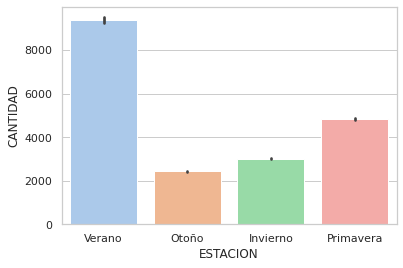

In [ ]:
sube_ba_amba = sube_nuevo.groupby("ESTACION", as_index=False)["CANTIDAD"].sum()
sns.barplot( x = 'ESTACION', y="CANTIDAD",data=sube_nuevo)
plt.show()

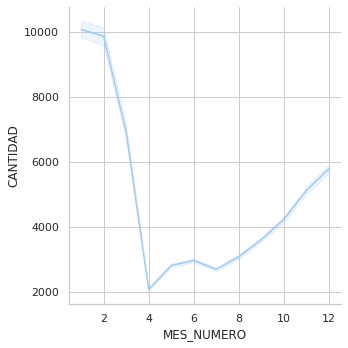

In [ ]:
sube_ba_amba = sube_nuevo[(sube_nuevo["PROVINCIA"]=="BUENOS AIRES") & (sube['AMBA']=="SI")]
sns.relplot(x = "MES_NUMERO", y = "CANTIDAD", data = sube_nuevo, kind = "line");

### **Análisis de transportes más utilizados**

***Otro análisis sencillo y directo de realizar es la cantidad de boletos vendidos para cada tipo de transporte.***

In [ ]:
sube_TRANSP = sube.groupby(["TIPO_TRANSPORTE"])

In [ ]:
dicc = {}
for grupo in sube_TRANSP.groups.keys():
  dicc[grupo] = sube_TRANSP.get_group(grupo)["CANTIDAD"].sum()

tabla_ventas = pd.DataFrame({"Tipo de Transporte":dicc.keys(), "Ventas de boletos":dicc.values()})

tabla_ventas = pd.DataFrame(data = tabla_ventas)
tabla_ventas

,Tipo de Transporte,Ventas de boletos
0,COLECTIVO,1579159375
1,LANCHAS,15258
2,SUBTE,73928371
3,TREN,139362543


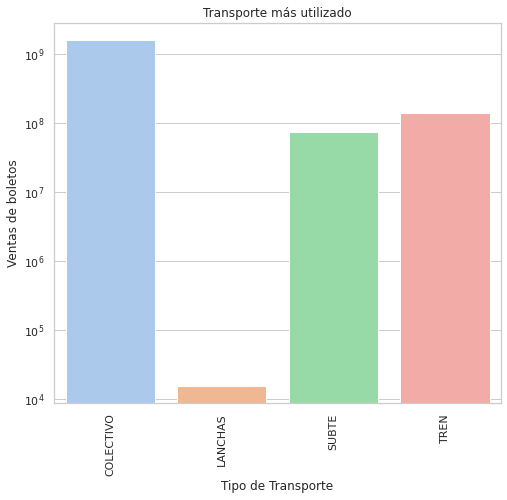

In [ ]:
fig = plt.figure(figsize=(8,7))
ax = plt.axes()
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Transporte más utilizado")
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=tabla_ventas["Tipo de Transporte"], y=tabla_ventas['Ventas de boletos'])

### **Análisis de que empresa vendió mayor cantidad de boletos**


***En todo el país y también fuera de AMBA***

In [ ]:
sube_EMPR= sube.groupby(["NOMBRE_EMPRESA"])

In [ ]:
sube_EMPR.size()

NOMBRE_EMPRESA
1 DE ENERO SRL                                     282
17 DE AGOSTO S.A.                                  366
25 DE AGOSTO SRL                                  1007
4 DE SEPTIEMBRE S.A.T.C.P.                         366
A T A C O NORTE S A C I                            412
                                                  ... 
UTENOR LINEA 723 UNION TRANSITORIA DE EMPRESAS     366
UTENOR SA L 722                                    366
VUELTA DE ROCHA S.A.T.C.I.                         366
YITOS S.A.                                        2184
ZARATE TRANSPORTE S.A.P.E.M.                       364
Length: 273, dtype: int64

***Utilizamos el código anterior para conseguir la suma de transacciones realizado por cada empresa.***

In [ ]:
dicc = {}
for grupo in sube_EMPR.groups.keys():
  dicc[grupo] = sube_EMPR.get_group(grupo)["CANTIDAD"].sum()

tabla_ventas_empresa = pd.DataFrame({"Empresa":dicc.keys(), "Ventas de boletos":dicc.values()})

tabla_ventas_empresa = pd.DataFrame(data = tabla_ventas_empresa)
tabla_ventas_empresa

,Empresa,Ventas de boletos
0,1 DE ENERO SRL,485774
1,17 DE AGOSTO S.A.,4107068
2,25 DE AGOSTO SRL,1793477
3,4 DE SEPTIEMBRE S.A.T.C.P.,6020717
4,A T A C O NORTE S A C I,583211
...,...,...
268,UTENOR LINEA 723 UNION TRANSITORIA DE EMPRESAS,2046540
269,UTENOR SA L 722,983746
270,VUELTA DE ROCHA S.A.T.C.I.,4110368
271,YITOS S.A.,11842737


***Ahora ordenamos el dataframe resultante de mayor a menor para visualizar las 5 empresas que más boletos vendieron en el año.***

In [ ]:
tabla_ventas_empresa.columns

tabla_ventas_empresa = tabla_ventas_empresa.sort_values('Ventas de boletos',ascending=False)
tabla_ventas_empresa.head()

,Empresa,Ventas de boletos
154,METROVIAS,73928371
203,SOFSE - Roca,60120799
247,TRANSPORTES LA PERLITA S.A.,44833216
84,EMPRESA LINEA 216 S.A.T.,44692434
124,LA CABAÑA S.A.,30300823


***Ahora podemos ver en el dataset principal mas informacion sobre cada empresa***

In [ ]:
sube[sube['NOMBRE_EMPRESA']=='METROVIAS'].sample(3)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
143355,2020-05-23,METROVIAS,LINEA SUBTE D,SI,SUBTE,PROVINCIAL,BUENOS AIRES,SN,5166
237893,2020-09-01,METROVIAS,LINEA_B,SI,SUBTE,PROVINCIAL,BUENOS AIRES,SN,18882
114718,2020-04-22,METROVIAS,LIN_PREMETRO,SI,SUBTE,PROVINCIAL,BUENOS AIRES,SN,295


In [ ]:
sube[sube['NOMBRE_EMPRESA']=='SOFSE - Roca'].sample(3)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
331087,2020-12-06,SOFSE - Roca,FFCC_ROCA_CAÑUELAS-LOBOS,SI,TREN,NACIONAL,JN,SD,26
341970,2020-12-17,SOFSE - Roca,FFCC_ROCA_UNIVERSITARIO,SI,TREN,NACIONAL,JN,SD,30
348048,2020-12-23,SOFSE - Roca,FFCC_ROCA_CAÑUELAS-LOBOS,SI,TREN,NACIONAL,JN,SD,27


In [ ]:
sube[sube['NOMBRE_EMPRESA']=='TRANSPORTES LA PERLITA S.A. '].sample(3)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
21906,2020-01-23,TRANSPORTES LA PERLITA S.A.,BSAS_LINEA_329,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,12093
258584,2020-09-23,TRANSPORTES LA PERLITA S.A.,BSAS_LINEA_500,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL RODRIGUEZ,6549
187651,2020-07-11,TRANSPORTES LA PERLITA S.A.,BSAS_LINEA_311,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,5385


In [ ]:
sube[sube['NOMBRE_EMPRESA']=='EMPRESA LINEA 216 S.A.T.'].sample(3)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
176055,2020-06-27,EMPRESA LINEA 216 S.A.T.,LINEA_504_ ITUZ,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ITUZAINGO,115
261570,2020-09-26,EMPRESA LINEA 216 S.A.T.,BSAS_LINEA_441,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,2652
293769,2020-10-29,EMPRESA LINEA 216 S.A.T.,BSAS_LINEA_443,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,335


In [ ]:
sube[sube['NOMBRE_EMPRESA']=='LA CABAÑA S.A.'].sample(3)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
4975,2020-01-06,LA CABAÑA S.A.,BSAS_LINEA_635,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MORON,9035
274457,2020-10-09,LA CABAÑA S.A.,BSAS_LINEA_624,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA MATANZA,13984
48476,2020-02-17,LA CABAÑA S.A.,BSAS_LINEA_624,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA MATANZA,26933


***Podemos observar que la empresa que más transacciones realizó son las siguientes:***

* **SUBTE de Buenos Aires.**
* **Empresa del tren Roca (BSAS).** 
* **Las 3 empresas restantes son de colectivos también de Buenos aires.**

**Ahora vamos analizar que empresa realiza mayor número de transacciones fuera de Buenos aires.**

In [ ]:
sube_SBA = sube[(sube['PROVINCIA']!= "BUENOS AIRES")&(sube['JURISDICCION']!= "NACIONAL")]

In [ ]:
sube_EM = sube_SBA.groupby(["NOMBRE_EMPRESA"])

In [ ]:
dicc = {}
for grupo in sube_EM.groups.keys():
  dicc[grupo] = sube_EM.get_group(grupo)["CANTIDAD"].sum()

tabla_ventas_empresa = pd.DataFrame({"Empresa":dicc.keys(), "Ventas de boletos":dicc.values()})

tabla_ventas_empresa = pd.DataFrame(data = tabla_ventas_empresa)
tabla_ventas_empresa

,Empresa,Ventas de boletos
0,1 DE ENERO SRL,485774
1,25 DE AGOSTO SRL,1793477
2,A T A C O NORTE S A C I,205908
3,AMERICA TRANSPORTE AUTOMOTOR S.R.L,1936413
4,AMERICA TRANSPORTE AUTOMOTOR S.R.L. - AZUL S.A...,729981
...,...,...
73,TRANSPORTES CLASUR S R L,665692
74,TRANSPORTES EL PLUMERILLO S.A.,5375867
75,TRANSPUNTANO SAPEM,4771061
76,USHUAIA INTEGRAL SOCIEDAD DEL ESTADO,1542868


In [ ]:
tabla_ventas_empresa.columns

tabla_ventas_empresa = tabla_ventas_empresa.sort_values('Ventas de boletos',ascending=False)
tabla_ventas_empresa.head()

,Empresa,Ventas de boletos
38,ERSA URBANO SA,17102567
53,PATAGONIA ARGENTINA S.R.L.,8234993
30,EMPRESA DE TRANSPORTES ALBARDON SRL,7880774
33,EMPRESA MAYO SRL,7378256
57,SANTA ANA SRL,7074644


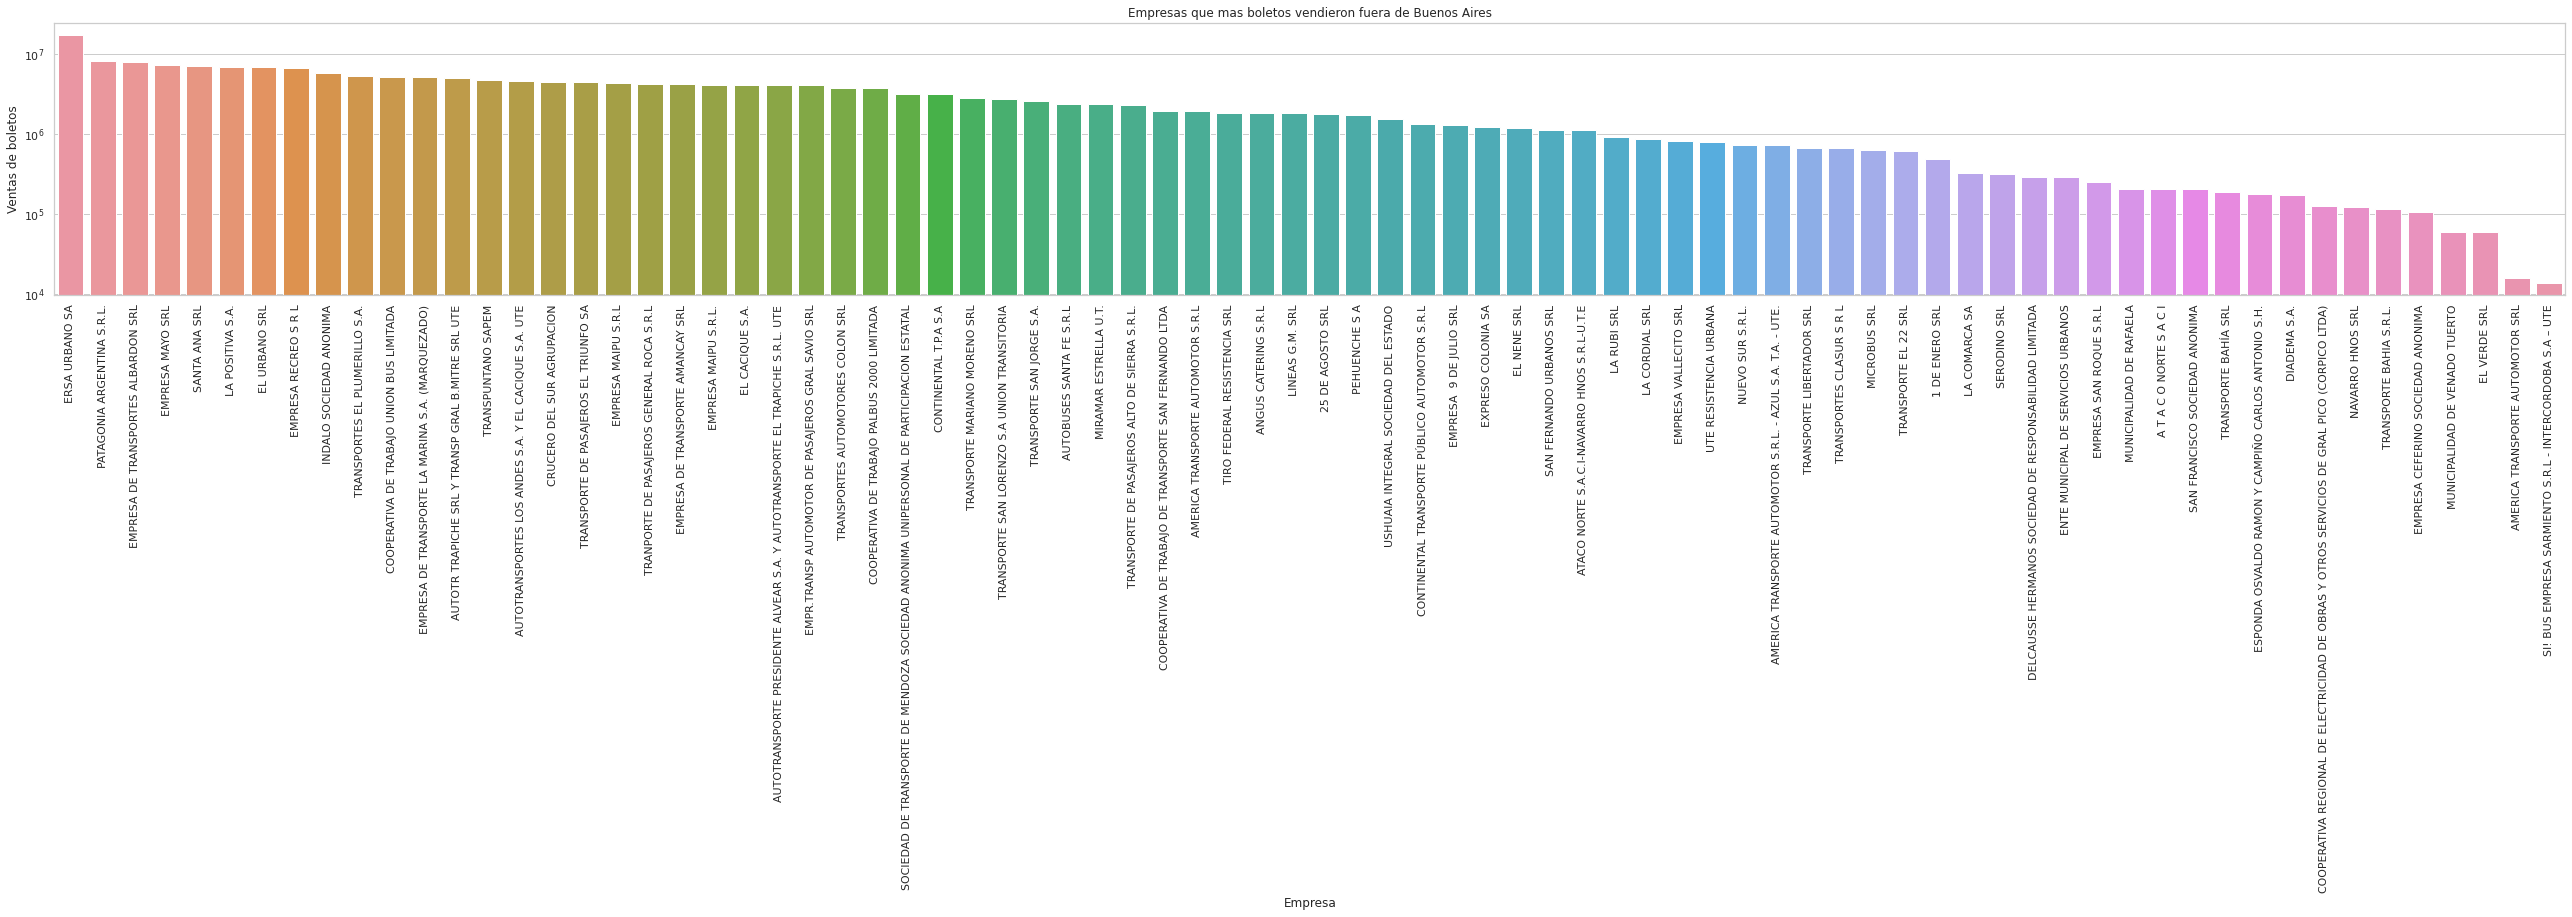

In [ ]:
fig = plt.figure(figsize=(45,5))
ax = plt.axes()
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Empresas que mas boletos vendieron fuera de Buenos Aires")
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=tabla_ventas_empresa["Empresa"], y=tabla_ventas_empresa['Ventas de boletos'])

***Ahora podemos ver en el dataset principal mas información sobre cada empresa:***

In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "ERSA URBANO SA"].sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
115086,2020-04-22,ERSA URBANO SA,LINEA_015_PRN,NO,COLECTIVO,MUNICIPAL,ENTRE RÍOS,PARANA,120
87673,2020-03-24,ERSA URBANO SA,LINEA_022_PRN,NO,COLECTIVO,MUNICIPAL,ENTRE RÍOS,PARANA,582
15262,2020-01-16,ERSA URBANO SA,LINEA_001_SFE,NO,COLECTIVO,MUNICIPAL,SANTA FE,SANTA FE,6796
116162,2020-04-23,ERSA URBANO SA,LINEA_11-21_PRN,NO,COLECTIVO,MUNICIPAL,ENTRE RÍOS,PARANA,350
94294,2020-03-31,ERSA URBANO SA,LINEA_103_CORR,NO,COLECTIVO,MUNICIPAL,CORRIENTES,CORRIENTES,674


In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "PATAGONIA ARGENTINA S.R.L."].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
215307,2020-08-09,PATAGONIA ARGENTINA S.R.L.,LINEA_001_CHT,NO,COLECTIVO,MUNICIPAL,CHUBUT,COMODORO RIVADAVIA,1256
287298,2020-10-22,PATAGONIA ARGENTINA S.R.L.,LINEA_009_CHT,NO,COLECTIVO,MUNICIPAL,CHUBUT,COMODORO RIVADAVIA,704
94147,2020-03-31,PATAGONIA ARGENTINA S.R.L.,LINEA_007_CHT,NO,COLECTIVO,MUNICIPAL,CHUBUT,COMODORO RIVADAVIA,152


In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "EMPRESA DE TRANSPORTES ALBARDON SRL"].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
155975,2020-06-06,EMPRESA DE TRANSPORTES ALBARDON SRL,LINEA_002_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,1540
356277,2020-12-31,EMPRESA DE TRANSPORTES ALBARDON SRL,LINEA_002_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,1677
26745,2020-01-27,EMPRESA DE TRANSPORTES ALBARDON SRL,LINEA_118_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,2742


In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "EMPRESA MAYO SRL"].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
99036,2020-04-05,EMPRESA MAYO SRL,LINEA_050_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,162
153232,2020-06-03,EMPRESA MAYO SRL,LINEA_050_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,1398
347553,2020-12-22,EMPRESA MAYO SRL,LINEA_116_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,5609


In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "SANTA ANA SRL"].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
196413,2020-07-20,SANTA ANA SRL,LINEA_029_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,322
121741,2020-04-29,SANTA ANA SRL,LINEA_036_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,511
169241,2020-06-20,SANTA ANA SRL,LINEA_011A_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,201


In [ ]:
sube_SBA[sube['NOMBRE_EMPRESA']== "SANTA ANA SRL"].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
343422,2020-12-18,SANTA ANA SRL,LINEA_017_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,2981
147643,2020-05-28,SANTA ANA SRL,LINEA_011A_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,1382
47887,2020-02-16,SANTA ANA SRL,LINEA_017_JUJ,NO,COLECTIVO,MUNICIPAL,JUJUY,SAN SALVADOR DE JUJUY,1015


**Podemos observar que la empresa que más transacciones realizó fuera de Buenos Aires son las siguientes:**

* **Ersa Urbano que funciona en varias provincias.**
* **Dos empresas de colectivo de la provincia de San Juan.**
* **Dos empresas de colectivo de la provincia de Jujuy.**

# ***CONCLUSION***

***Se pudo comprobar que existe una desproporcionalidad en la medida 'Cantidad' debido a la diferencia en la cantidad de habitantes que hay en Buenos Aires y CABA con respecto a las provincias del interior, es por esto que se trató de hacer un análisis diferenciado. Sumando la cantidad de boletos por cada registro y no solamente tomar la cantidad de registros.  Un hecho importante a tener en cuenta es que la cuarentena originó una caída abrupta del uso de la sube.***

***De todo este desarrollo puede concluirse, siguiendo lo planteado como objetivo, que la gran mayoría de las empresas que presentan más venta de boletos (y por diferencia), son aquellas que se encuentran principalmente en AMBA, por lo que allí sería un lugar ideal para plantearse el brindar un servicio de este tipo. A su vez, hay que reconocer dos hechos importantes, en principio el que con este análisis no se contempla el global de la actividad Argentina del rubro sino una parte que es la que utiliza la tarjeta Sube, y tambien hay que recordar la existencia de un sesgo en este 2020, el cual fue un año muy particular como consecuencia de la pandemia, por lo que posiblemente presente una diferencia importante respecto a lo sucedido en años pasados.***
